# Background: 
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualise how honey production is changed over the years (1998-2016) in the United States. 

# Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* state: Various states of U.S.
* numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
* year: Year of production

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Contents:

- <a href = #link1> 1.1 Import the libraries  </a>
- <a href = #link2> 1.2 Load dataset and check shape and variables  </a>
- <a href = #link3> 1.3 Check Statistical summary for all the datasets  </a>
- <a href = #link4> 1.4 EDA  </a>
- <a href = #link5> 1.5 Summary  </a>

<a id = "link1"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.1 Import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # To supress warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

<a id = "link2"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.2 Load dataset and check shape and variables

In [2]:
honeyprod=pd.read_csv('honeyproduction1998-2016.csv')

In [3]:
honeyprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00000,71,1136000.00000,159000.00000,0.72000,818000.00000,1998
1,Arizona,55000.00000,60,3300000.00000,1485000.00000,0.64000,2112000.00000,1998
2,Arkansas,53000.00000,65,3445000.00000,1688000.00000,0.59000,2033000.00000,1998
3,California,450000.00000,83,37350000.00000,12326000.00000,0.62000,23157000.00000,1998
4,Colorado,27000.00000,72,1944000.00000,1594000.00000,0.70000,1361000.00000,1998


In [4]:
honeyprod.shape

(785, 8)

In [5]:
honeyprod.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

Observations: 
1. state is object data type
2. Year is a categorical variable here so let us convert it to category data data type in Python. 
2. All the other variables are numerical and there for their python data types (float64 and int64) are ok.

##### Convert Year to category

In [6]:
honeyprod.year=honeyprod.year.astype('category')

In [7]:
honeyprod.dtypes

state            object
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year           category
dtype: object

##### Check state and year

In [8]:
print(honeyprod.state.nunique())
print(honeyprod.year.nunique())

44
19


The current data includes 44 state over a span of 19 years.

<a id = "link3"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.3 Check Statistical summary for all the datasets

In [9]:
honeyprod.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,785.00000,61686.62420,92748.94046,2000.00000,9000.00000,26000.00000,65000.00000,510000.00000
yieldpercol,785.00000,60.57834,19.42783,19.00000,46.00000,58.00000,72.00000,136.00000
totalprod,785.00000,4140956.68790,6884593.85877,84000.00000,470000.00000,1500000.00000,4096000.00000,46410000.00000
stocks,785.00000,1257629.29936,2211793.81706,8000.00000,119000.00000,391000.00000,1380000.00000,13800000.00000
priceperlb,785.00000,1.69516,0.93062,0.49000,1.05000,1.48000,2.04000,7.09000
prodvalue,785.00000,5489738.85350,9425393.87822,162000.00000,901000.00000,2112000.00000,5559000.00000,83859000.00000


Observations:
1. The mean numcol is close to the 75% percentile of the data, indicating a right skew.
2. Number of colonies are spread over a huge range. Ranging from 2000 to 510000.
3. Standard deviation of numcol is very high.
4. Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.

<a id = "link4"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.4 EDA

### Univariate analysis

In [10]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Numver of Colonies

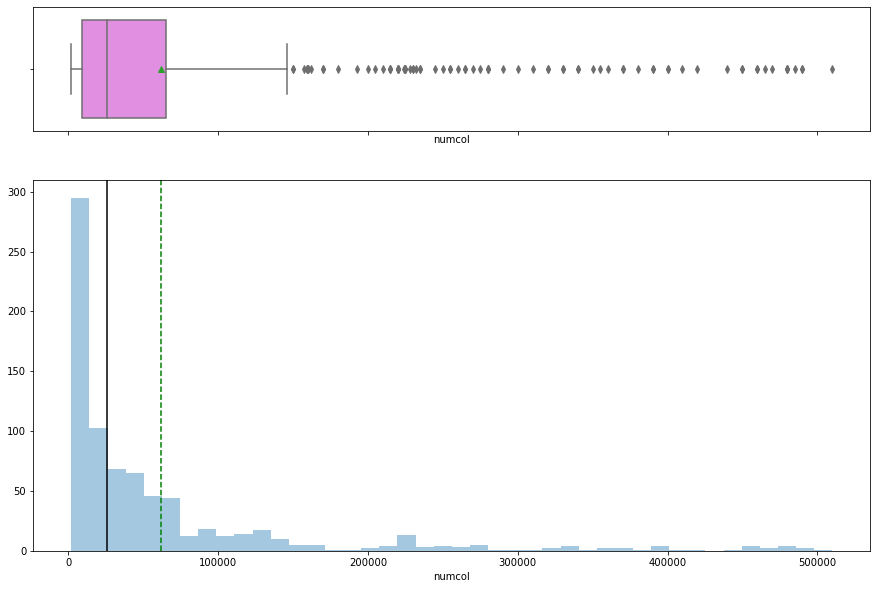

In [11]:
histogram_boxplot(honeyprod["numcol"])

Observations:
1. The distribution of nucol is right skewed.
2. There are a outliers in this variable.

#### Observations on Numver of yieldpercol

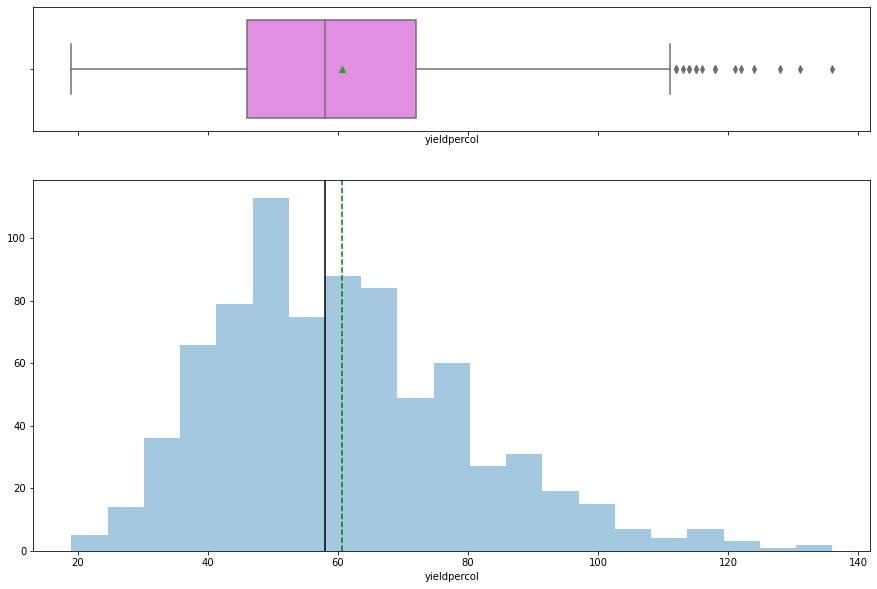

In [12]:
histogram_boxplot(honeyprod["yieldpercol"])

#### Observations on Numver of totalprod 

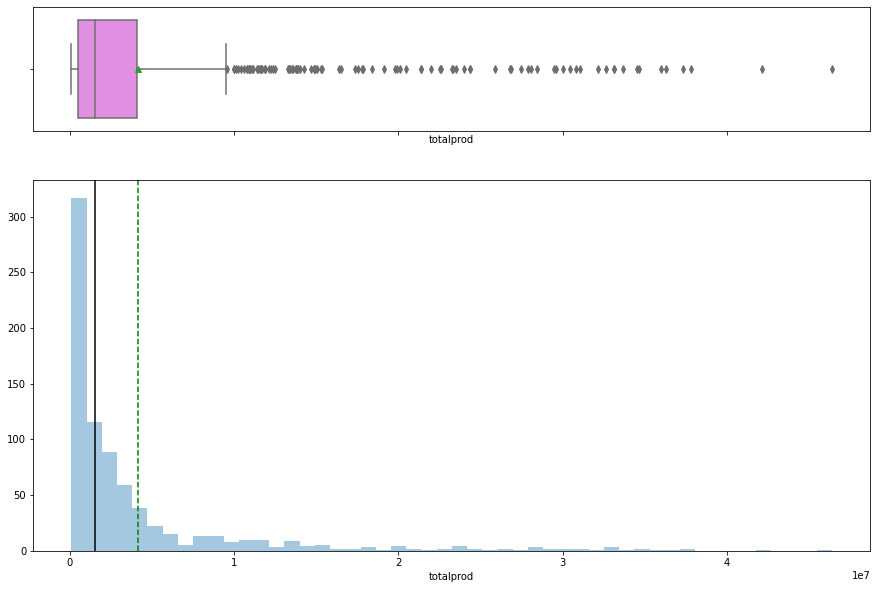

In [13]:
histogram_boxplot(honeyprod["totalprod"])

#### Observations on Numver of stocks

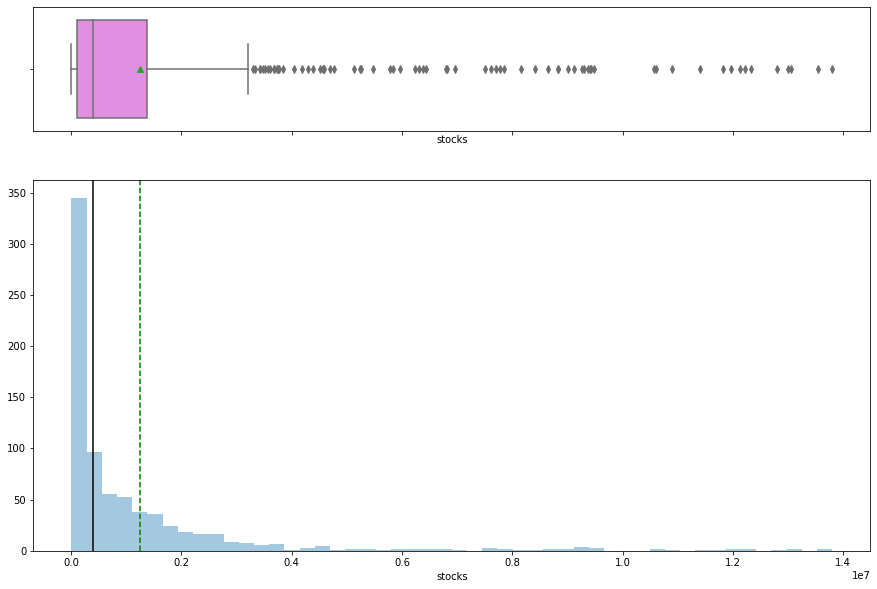

In [14]:
histogram_boxplot(honeyprod["stocks"])

#### Observations on Numver of priceperlb

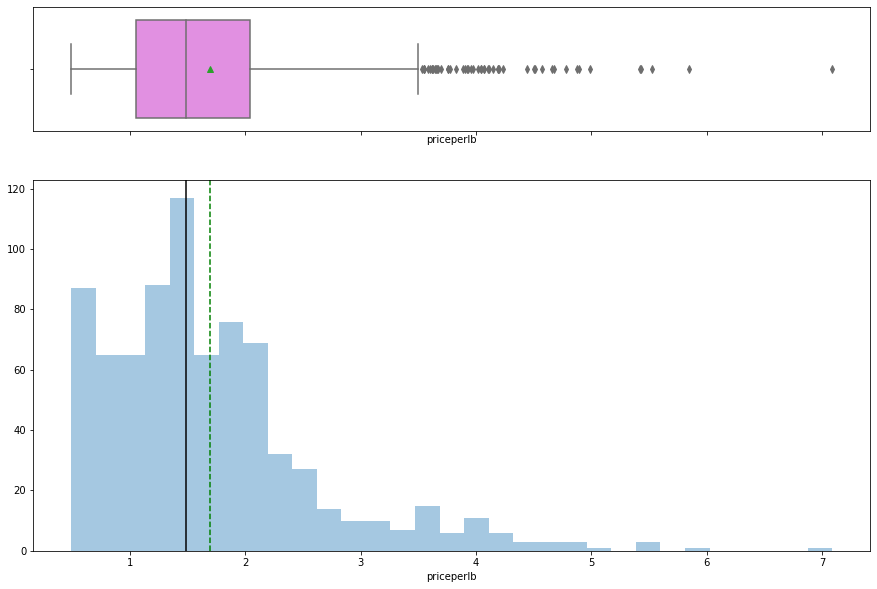

In [15]:
histogram_boxplot(honeyprod["priceperlb"])

#### Observations on Numver of prodvalue 

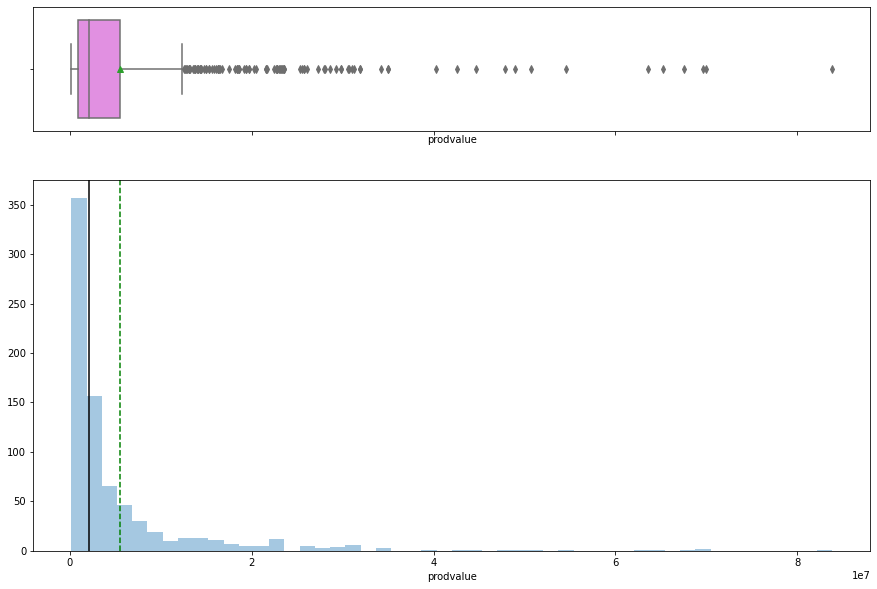

In [16]:
histogram_boxplot(honeyprod["prodvalue"])

## Bivariate Analysis(relationship between numerical variables using pair plots and correlation plots)

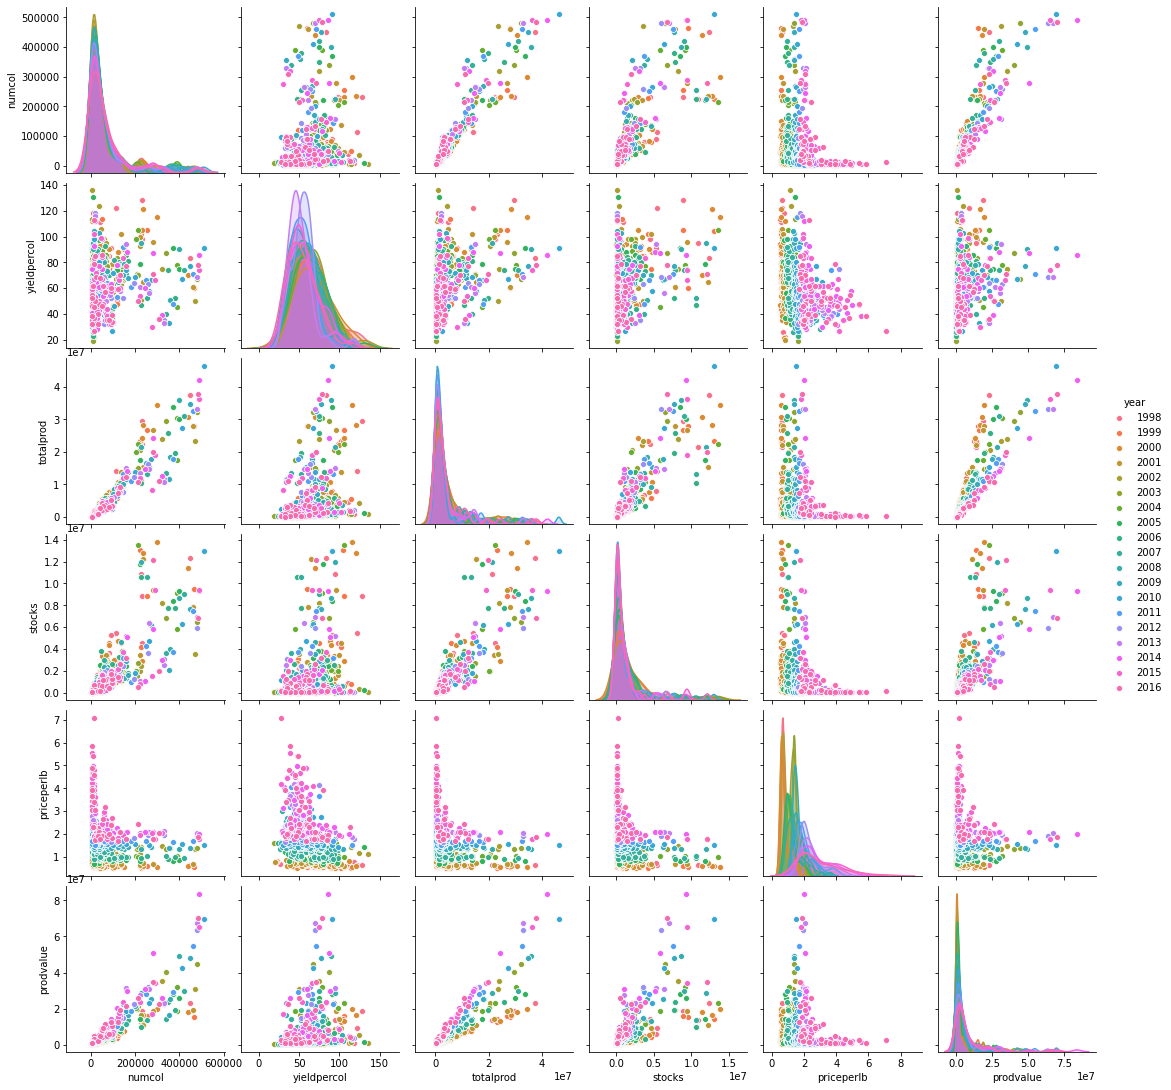

In [17]:
sns.pairplot(data=honeyprod,hue="year")
plt.show()

In [18]:
correlation = honeyprod.corr() # creating a 2-D Matrix with correlation plots
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.00000,0.22454,0.95182,0.82008,-0.21143,0.89899
yieldpercol,0.22454,1.00000,0.38295,0.35868,-0.36057,0.25579
totalprod,0.95182,0.38295,1.00000,0.87687,-0.23909,0.89524
stocks,0.82008,0.35868,0.87687,1.00000,-0.27593,0.71316
priceperlb,-0.21143,-0.36057,-0.23909,-0.27593,1.00000,-0.06183
prodvalue,0.89899,0.25579,0.89524,0.71316,-0.06183,1.00000


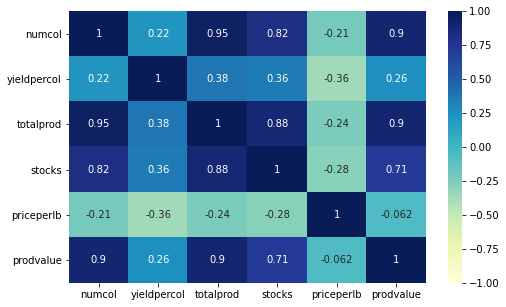

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(honeyprod.corr(),annot=True,cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

Observations:
    1. Number of colonies have a high positive correlation with total production, stocks and the value of production. 
    2. Yield per colony and priceperlb does not have a high correlation with any of the features. 
 

####  Honey production in the US over the years

In [20]:
honeyprod.groupby(['year'])['totalprod'].sum().reset_index()

,year,totalprod
0,1998,219519000.00000
1,1999,202387000.00000
2,2000,219558000.00000
3,2001,185748000.00000
4,2002,171265000.00000
5,2003,181372000.00000
6,2004,182729000.00000
7,2005,173969000.00000
8,2006,154238000.00000
9,2007,147621000.00000


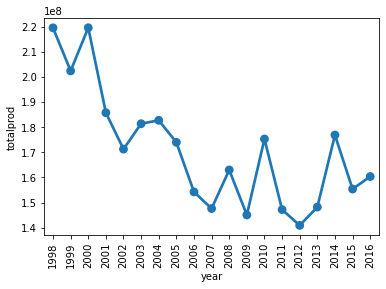

In [37]:
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90);

Observations: 
    1. The overall honey production in the US has been decreasing since 1998.

####  Number of colonies and years

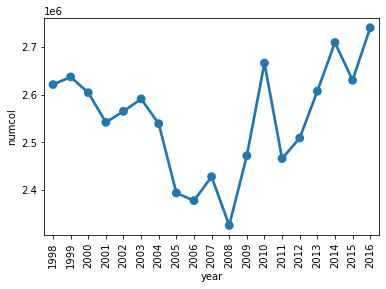

In [38]:
sns.pointplot(x='year', y='numcol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90);

Observations: 
1. Number of colonies is decreasing since 1988 till 2007 and then shows upward trend since 2008.
2. Increase of colonies since 2008 might be related with some intervention that could have resulted the colonies growth.

####  yield per colony and years

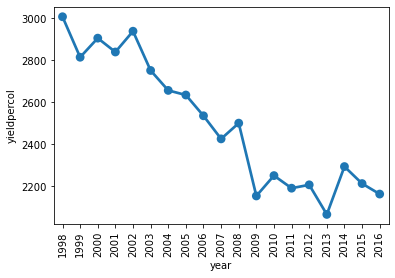

In [12]:
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90);

Observations: 
1. Yield per colony keeps decreasing since 1988.
2. From the graph it is clear that the increase in number colony from 2008 did not resulted growth in yield per colony. So, the decline of honey production is not due to the decline of total number of colonies instead is related to the yield per colony


#### production trend variation at state level

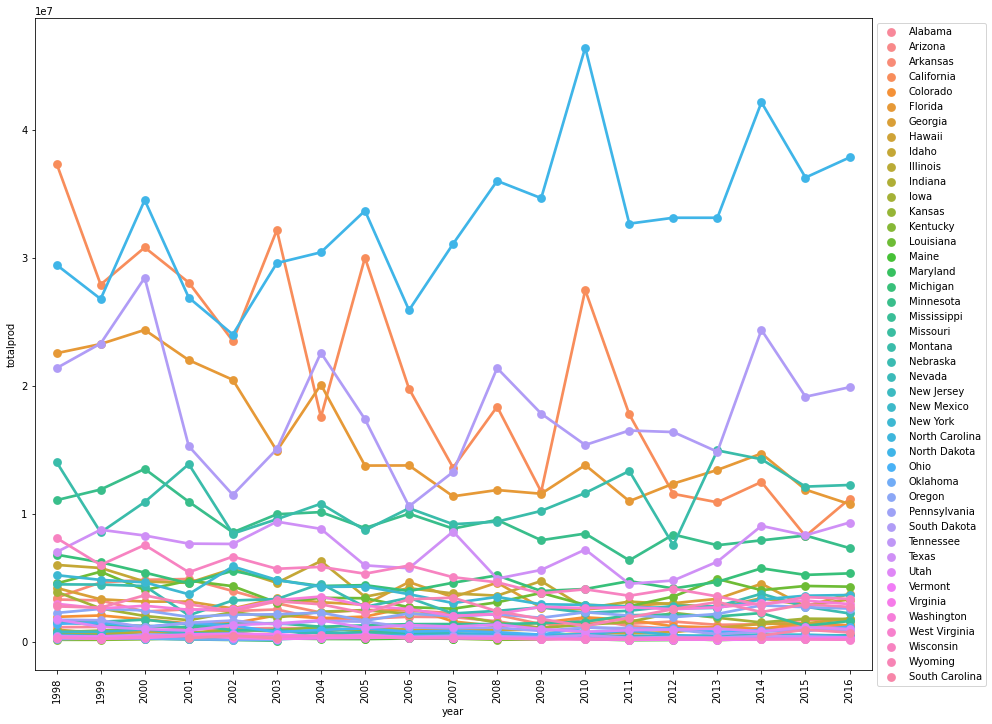

In [23]:
plt.figure(figsize = (15,12)) 
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) ;

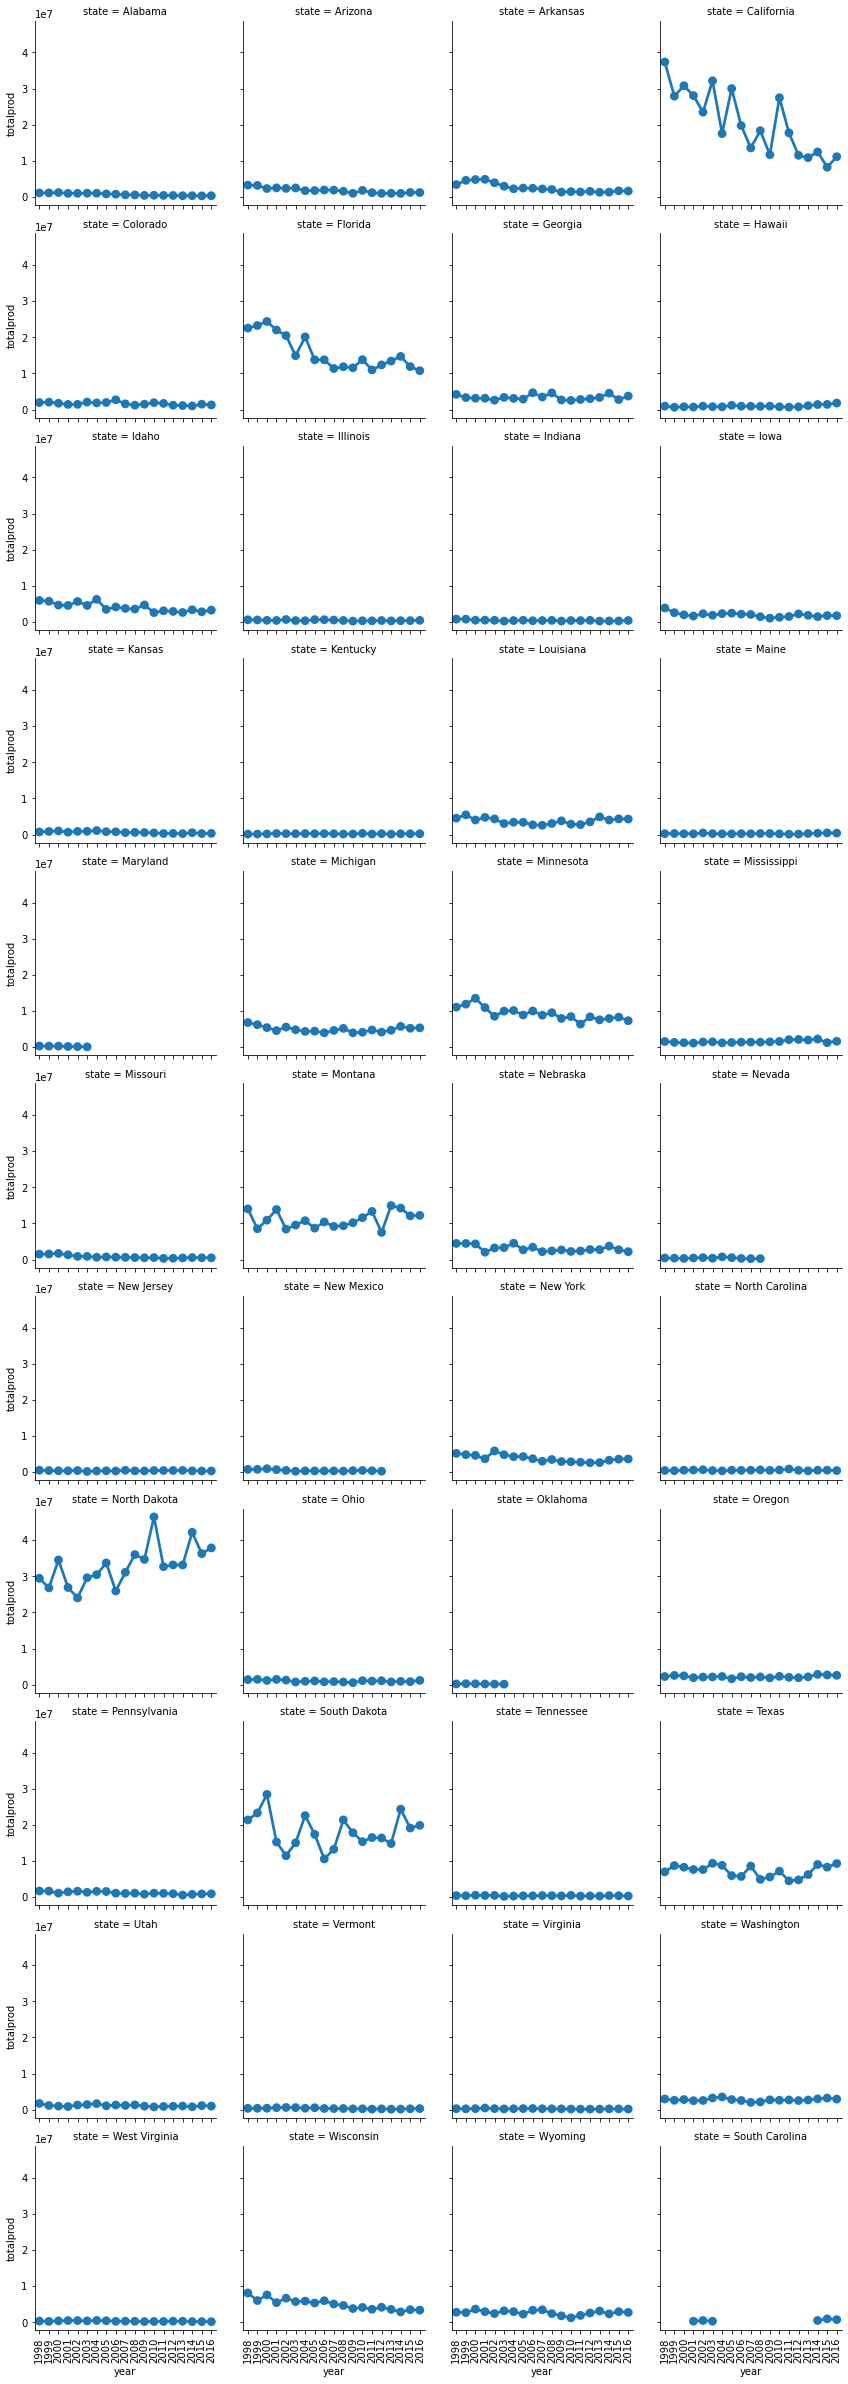

In [37]:
plot_tp=sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 4)
plot_tp.set_xticklabels(rotation=90) ;

###### Observations:
    1. California, Florida, North Dakota and South Dakota and Montana are top honey producing state 
    2. North Dakota has seen an increase in the honey production.
    3. Honey production in South Dakota has maintain its level.
    4. Honey total production in California has declined drastically.
    5. Total production in Florida has also been declined.


#### Top 5 honey producting State

In [33]:
 honeyprod.groupby(['state'])['totalprod'].mean().sort_values(ascending = False).reset_index().head()

,state,totalprod
0,North Dakota,32865000.00000
1,California,20542894.73684
2,South Dakota,18124263.15789
3,Florida,15673578.94737
4,Montana,11059210.52632


#### Number of colonies and yield per colony in top 5 honey producting states

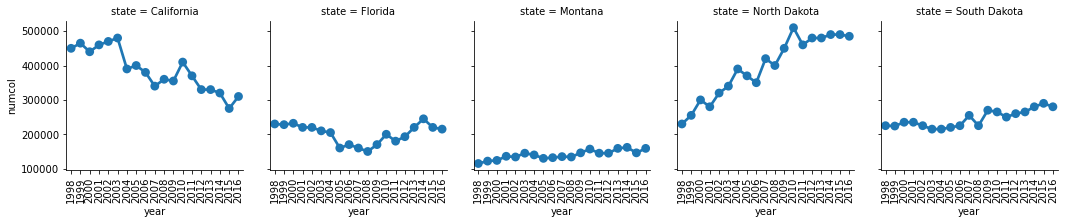

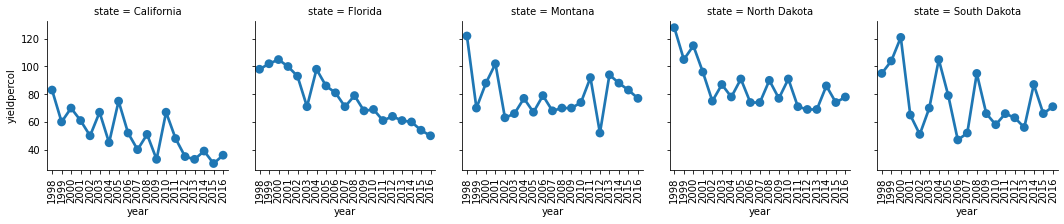

In [41]:
plot_numcol=sns.catplot(x='year', y='numcol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plot_numcol.set_xticklabels(rotation=90) 
plt.show()
plot_yieldpercol=sns.catplot(x='year', y='yieldpercol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plot_yieldpercol.set_xticklabels(rotation=90) 
plt.show()

Observation:
1. Significant increase in number of colonies only happen in North Dakota over the years as compared to the other 4 states.
2. We can see overall decreasing trend for yield per colony across the top 5 state.


#### Value of production over year

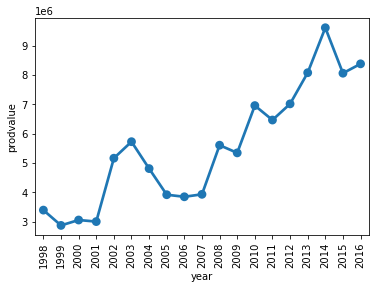

In [17]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90);

Observations: 
* The value of production per pound has increased over time with declined supply showing the demand has added value to the honey price


#### Compare total production with the stocks held by the producers in different states.

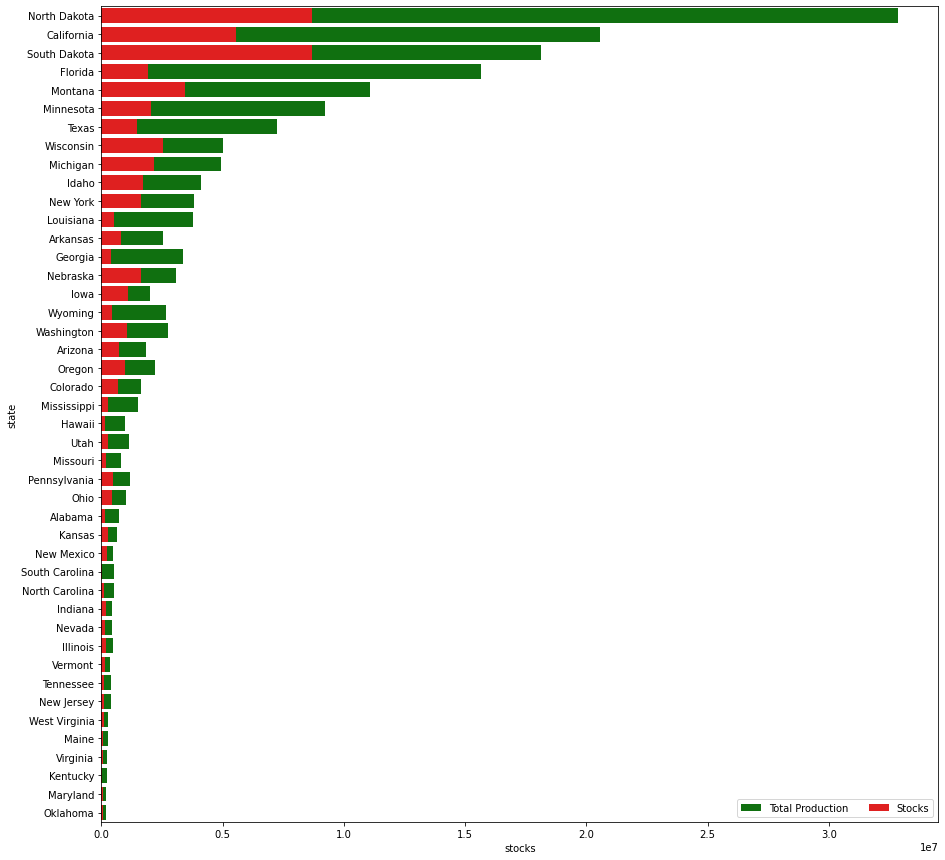

In [25]:
plt.figure(figsize = (15,15)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="g", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observations: 
    1. Stock held by North and South Dakota is same while production by North Dakota is much higher. This shows that North Dakota is better in selling honey than South Dakota.
    2. Florida is best in selling honey among top 5 honey producing state.
    3. Louisiana is better in selling as compared to New York. 


<a id = "link5"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.5 Summary

1. Based on the EDA we can conclude that the honey production has declined year over year.
2. The value of production per pound has increased over time with declined supply showing the demand has added value to the honey price
3. Yield per colony looks like is the main reason behind declined honey production year over year.
4. Top five honey producing states are California, Florida, North Dakota, South Dakota and Montana.
5. Among top five honey producing state, Florida is most efficient state in selling honey.
